# Project 1: Basic Python - IMDb 21st Century Rating Analysis

## Introduction

In this project, you will work with data from the entertainment industry. You will study a dataset with records on popular movies released from 1999 onward. The research will focus on the modern era of cinema and explore whether popularity (number of IMDb votes) aligns with viewer quality ratings.

The aim of this project is to determine the following:  

**Do the most highly-rated movies of the 21st century also receive the most IMDb votes?**  

The project will focus on movies from 1999 onward and explore the relationship between IMDb rating (quality) and number of votes (popularity).

### Stages

Data on movies is stored in the `imdb_top_1000.csv` file. You will explore the dataset to assess data quality and analyze the relationship between IMDb ratings and the number of votes.

Your project will consist of three stages:
- Stage 1 – Data Overview
- Stage 2 – Data Preprocessing
- Stage 3 – Data Analysis


## Stage 1 - Data overview 

Open and explore the data.

You'll need `pandas`, so import it.

In [1]:
# importing libraries
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\Eva Brown\\github_projects_datasets_02'

Read the `imdb_top_1000.csv`and save it in the `df` variable:

In [6]:
# Placeholder: Loading Data 
df = pd.read_csv('datasets/imdb_top_1000.csv', )

Print the first 10 table rows:

In [9]:
# obtaining the first 10 rows from the df table
# hint: you can use head() and tail() in Jupyter Notebook without wrapping them into print()
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [11]:
df.columns = df.columns.str.lower()

In [13]:
# sanity check
df.columns

Index(['poster_link', 'series_title', 'released_year', 'certificate',
       'runtime', 'genre', 'imdb_rating', 'overview', 'meta_score', 'director',
       'star1', 'star2', 'star3', 'star4', 'no_of_votes', 'gross'],
      dtype='object')

Obtain the general information about the table with one command:

In [16]:
# obtaining general information about the data in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poster_link    1000 non-null   object 
 1   series_title   1000 non-null   object 
 2   released_year  1000 non-null   object 
 3   certificate    899 non-null    object 
 4   runtime        1000 non-null   object 
 5   genre          1000 non-null   object 
 6   imdb_rating    1000 non-null   float64
 7   overview       1000 non-null   object 
 8   meta_score     843 non-null    float64
 9   director       1000 non-null   object 
 10  star1          1000 non-null   object 
 11  star2          1000 non-null   object 
 12  star3          1000 non-null   object 
 13  star4          1000 non-null   object 
 14  no_of_votes    1000 non-null   int64  
 15  gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


**Numeric Columns (For Analysis):**
|Column	|Type	|Non-null Count	|Notes|
|-------------|------------|------|------|
|imdb_rating	|float64	|1000	|Great! Clean and ready to use |
|meta_score	|float64	|**843**	|**Missing 157 values**|
|no_of_votes	|int64	|1000	 |Clean and essential for analysis |


**Additional Missing Values:**
|Column	|Type	|Nulls?	|Notes|
|-------------|------------|------|------|
|certificate	|object	|101 missing	|movie rating/certification |
|meta_score	|float64	|157 missing	|critic score (optional for now)|
|gross	|object	|169 missing	 |revenue - not needed yet |


**Object columns to Consider Cleaning Late**
- `released_year` is stored as an **object**, but should be numeric (to be fixed in preprocessing).
- `runtime` and `gross` are also **object**, but contain numbers with symbols (e.g., "142 min", "$123M")

These can be cleaned up in Stage 2: Preprocessing. 

### Stage 1: Data Overview 

The dataset contains 1,000 rows and 16 columns. Most of the columns are stored as object types, with a few key columns in numeric format: 
- `imdb_rating` (float64) and `no_of_votes` (int64) will be used for analysis.
- `meta_score` is also numeric but contains 157 missing values.
- `released_year` is stored as an object and will need to be converted to numeric. 

Missing values are present in the following columns:
- `certificate`: 101 missing
- `meta_score`: 157 missing
- `gross`: 169 missing

These gaps do not affect the primary goal of this project, which focuses on the relationship between IMDB ratins and vote counts. 

In [22]:
df.describe()

,imdb_rating,meta_score,no_of_votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


## Data Summary – Statistical Overview

### IMDb Rating:
- All movies are well-rated, between 7.6 and 9.3.
- The average rating is ~7.95 with a low standard deviation.
- This indicates the dataset is highly curated, and ratings are clustered tightly.

### Meta Score:
- Critical review scores range from 28 to 100.
- ~16% of values are missing and may require imputation or exclusion.
- The broader spread suggests greater variability in critic opinions.

### Number of Votes:
- Vote counts range from ~25K to over 2.3 million.
- The distribution is highly skewed with a large standard deviation.
- A log scale is recommended for plotting and interpretation.



## Stage 2: Data Preprocessing

In [26]:
# calculating missing values 
#isna Detect missing values in a DataFrame.
df.isna().sum()

poster_link        0
series_title       0
released_year      0
certificate      101
runtime            0
genre              0
imdb_rating        0
overview           0
meta_score       157
director           0
star1              0
star2              0
star3              0
star4              0
no_of_votes        0
gross            169
dtype: int64

In [28]:
# impute missing values 
df['meta_score'] = df['meta_score'].fillna(df['meta_score'].median())

In [30]:
# The 'certificate' column is categorical, for any missing values the cateogry 'Not Rated' will be added. 
df['certificate'] = df['certificate'].fillna('Not Rated')

In [32]:
# sanity check
df.isna().sum()

poster_link        0
series_title       0
released_year      0
certificate        0
runtime            0
genre              0
imdb_rating        0
overview           0
meta_score         0
director           0
star1              0
star2              0
star3              0
star4              0
no_of_votes        0
gross            169
dtype: int64

### Stage 2: Handling Missing Values

Three columns had missing values:
- `certificate`: 101 missing (filled with 'Not Rated')
- `meta_score`: 157 missing (filled with column median)
- `gross`: 169 missing (left as-is and not used in this analysis.

These changes ensure that our key features (`imdb_rating` and `no_of_votes` remain unaffected, while still retaining the richness of supporting columns.

### Check for Duplicates 
Find the number of duplicate rows in the table using one command:

In [36]:
# counting duplicate rows
df.duplicated().sum()

0

In [38]:
df.count()

poster_link      1000
series_title     1000
released_year    1000
certificate      1000
runtime          1000
genre            1000
imdb_rating      1000
overview         1000
meta_score       1000
director         1000
star1            1000
star2            1000
star3            1000
star4            1000
no_of_votes      1000
gross             831
dtype: int64

In [40]:
# Check for duplicates based on 'series_title'

df['series_title'].duplicated().sum()


1

In [42]:
df[df['series_title'].duplicated(keep=False)]


,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
87,https://m.media-amazon.com/images/M/MV5BYmY3Mz...,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,79.0,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,79.0,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


### Duplicate Title Analysis

The dataset contained one duplicated movie title: **Drishyam**.

Upon inspection, the two entries refer to different movies:
- Released in different years (2013 and 2015)
- Directed by different individuals
- Classified under slightly different genres

As such, both entries were retained.


## Stage 3 - Data analysis <a id='hypotheses'></a>

At this stage, it is important to test the project's core assumption: 

**Do highly-rated movies from the 21st century also receive the most IMDb votes?** 

*(Quality vs Popularity)*

Using filtering, visualizing, and interpreting. 

In [47]:
# Filter dataset to 1999+
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df_filtered = df[df['released_year'] >= 1999]

In [49]:
# sanity check 
df_filtered.head()

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003.0,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010.0,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999.0,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001.0,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,"315,544,750"


#### Visualization: Create a Scatterplot

- X-axis = `no_of_voites` (log scale for skew)
- y-axis = `imdb_rating`


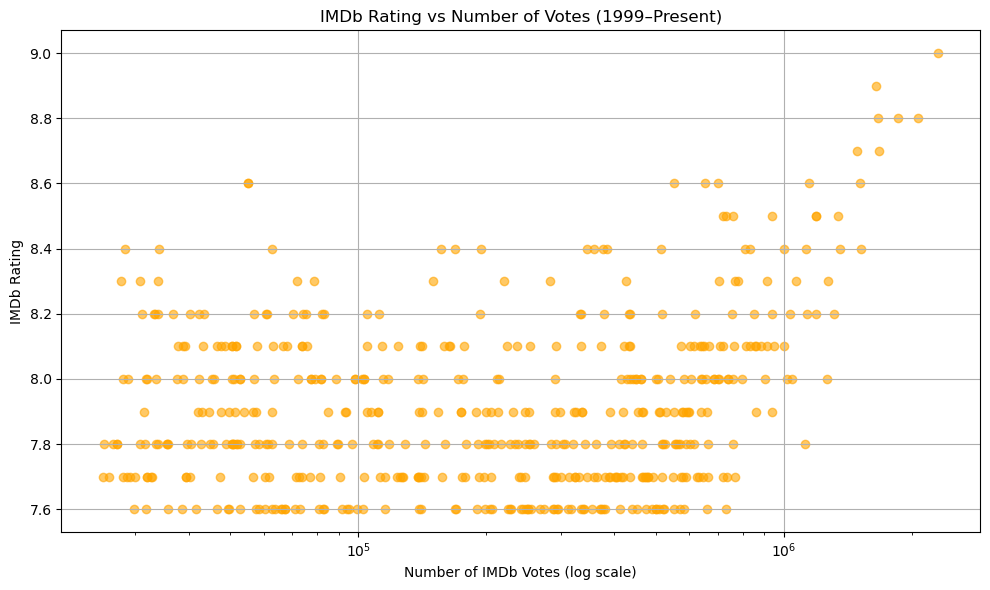

In [51]:

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['no_of_votes'], df_filtered['imdb_rating'], alpha=0.6, color='orange')
plt.xscale('log')
plt.xlabel('Number of IMDb Votes (log scale)')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating vs Number of Votes (1999–Present)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
# calculate correlation
df_filtered[['imdb_rating', 'no_of_votes']].corr()

,imdb_rating,no_of_votes
imdb_rating,1.000000,0.452202
no_of_votes,0.452202,1.000000


`imdb_rating` vs `no_of_votes` = 0.4522

- The correlation coefficient is +0.45
- That’s a **moderate positive relationship** (not weak, not strong)

**Interpretation:**

Higher popularity is associated with higher ratings, but it's not a guarnatee - other factors matter too (like genre, fanbase, exposure). 

### Stage 3: Analysis of IMDb Rating vs. Number of Votes

A scatterplot was created to explore the relationship between IMDb rating and numer of votes for movies released from 1999 onward. 

- A logarithmic scale was used for vote counts to better visualize the wide range of values.
- The correlation coefficient between IMDbrating and number of votes is approximately **0.45**, indicating a moderate positive relationship.
- This suggests that more popular films tend to be rated slightly higher, but the relationship is not perfectly linear.

Noteably, some high-rated filmes received fewer votes, while others with high vote counts had average ratings. 

## Final Conclusion 

This project explored the relationship between a movie's **IMDb rating** and its **popularity**, measured by the number of votes, using the publicly available IMDb top 1000 datset. 

**Key Findings:**
- All movies int he dataset are highly rated (7.6 - 9.3), due to the curated nature of IMDb's Top 1000.
- The number of votes varied significantly from ~25K to 2M+), requiring the use of a logarithmic scale to visualize.
- The correlation between rating and votes was **moderate** (r = 0.45).
  - Popular movies tend to receive slightly higher ratings.
  - However, quality and popularity are not perfectly aligned.

### Reflection 

This project highlights that **user-driven ratings** reflect more than just quality - they reflect visibility, fandom, and access.

Popularity is influenced by many external factors beyond a film's perceived merit. 

This version of Project 1 builds on the original TripleTen version by applying:
- A public dataset
- Flexible filtering
- Custom EDA and visualization decisions. 